<a href="https://colab.research.google.com/github/Ashaduzzaman12/Machine_learning/blob/main/insect_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam  # Added this import


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

# Dataset configuration
dataset_path = '/content/drive/MyDrive/practice/agriculture'
img_size = (224, 224)
batch_size = 32
seed = 42

# Data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [6]:
# Train generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=seed
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=seed
)

Found 4399 images belonging to 12 classes.
Found 1095 images belonging to 12 classes.


Found 4399 images belonging to 12 classes.
Found 1095 images belonging to 12 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.2095 - loss: 2.3913 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


137/137 ━━━━━━━━━━━━━━━━━━━━ 3605s 26s/step - accuracy: 0.2101 - loss: 2.3896 - val_accuracy: 0.4862 - val_loss: 1.7115
Epoch 2/6
  1/137 ━━━━━━━━━━━━━━━━━━━━ 43:54 19s/step - accuracy: 0.4375 - loss: 1.6429

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


137/137 ━━━━━━━━━━━━━━━━━━━━ 733s 5s/step - accuracy: 0.4375 - loss: 1.6429 - val_accuracy: 0.5064 - val_loss: 1.6975
Epoch 3/6
137/137 ━━━━━━━━━━━━━━━━━━━━ 3541s 26s/step - accuracy: 0.4191 - loss: 1.7789 - val_accuracy: 0.5303 - val_loss: 1.4837
Epoch 4/6
  1/137 ━━━━━━━━━━━━━━━━━━━━ 47:02 21s/step - accuracy: 0.5938 - loss: 1.6395

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


137/137 ━━━━━━━━━━━━━━━━━━━━ 738s 5s/step - accuracy: 0.5938 - loss: 1.6395 - val_accuracy: 0.5312 - val_loss: 1.4831
Epoch 5/6
137/137 ━━━━━━━━━━━━━━━━━━━━ 3483s 25s/step - accuracy: 0.5009 - loss: 1.5533 - val_accuracy: 0.5956 - val_loss: 1.3452
Epoch 6/6
  1/137 ━━━━━━━━━━━━━━━━━━━━ 42:56 19s/step - accuracy: 0.5000 - loss: 1.5582

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


137/137 ━━━━━━━━━━━━━━━━━━━━ 739s 5s/step - accuracy: 0.5000 - loss: 1.5582 - val_accuracy: 0.5772 - val_loss: 1.3577


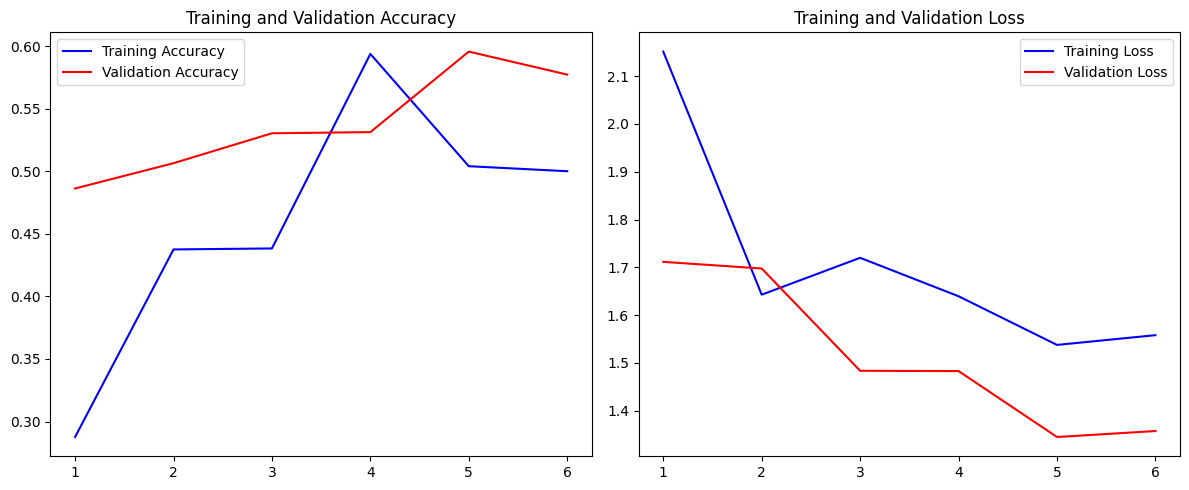

In [7]:

# Load training data
train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=seed
)

# Load validation data
val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=seed
)

# Load VGG16 model
vgg_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_size[0], img_size[1], 3)
)
vgg_base.trainable = False

# Build custom classifier
num_classes = len(train_data.class_indices)

model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Now properly defined
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_data,
    epochs=6,
    validation_data=val_data,
    steps_per_epoch=train_data.samples // batch_size,
    validation_steps=val_data.samples // batch_size
)

# Visualization function remains the same
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)